<a href="https://colab.research.google.com/github/Fameless4ellL/GoogleCollabML/blob/main/Computional_Intelligence_LAB_02_Exercise_02(w57673).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exercise based on description
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-adding-hidden-layers/

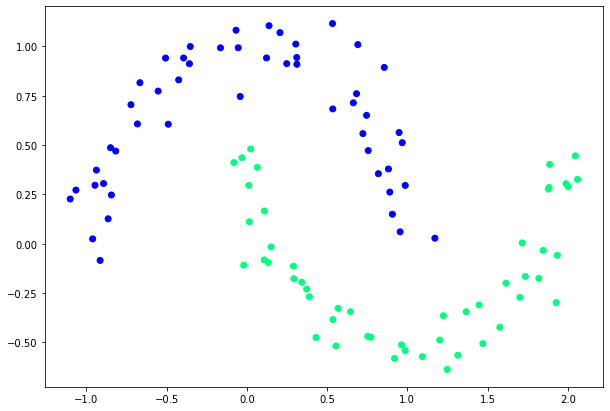

In [ ]:
#generate the dataset that we are going to use, 
#in order to train and test our neural network.

from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from  sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

In [ ]:
#here is simple neural network 
#with only one neuron

error_array=[] # prepare a list  to store value of error for each epoch

labels = labels.reshape(100, 1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def swish(x):
    return x*sigmoid(x)

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

np.random.seed(42)
weights = np.random.rand(2, 1) 
lr = 0.03
bias = np.random.rand(1)

for epoch in range(300000):
    inputs = feature_set

    # feedforward step 1
    XW = np.dot(feature_set,weights) + bias

    # feedforward step 2
    z = sigmoid(XW)

    # backpropagation step 1
    error_out = ((1 / 2) * (np.power((z - labels), 2)))
    
    #small modification to the code to show
    #error only for epoch which is factor of 10000
    #you cane increase or decrease this factor
    if (epoch % 10000) == 0 :
      print("epoch : "+str(epoch)+" error : "+str(error_out.sum()))

    error_array.append(error_out.sum()) #store error for epoch

    error = z - labels

    # backpropagation step 2
    dcost_dpred = error
    dpred_dz = sigmoid_der(z) 

    z_delta = dcost_dpred * dpred_dz

    inputs = feature_set.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

epoch : 0 error : 17.553996678204935
epoch : 10000 error : 4.1792594621486385
epoch : 20000 error : 4.1792594621486385
epoch : 30000 error : 4.1792594621486385
epoch : 40000 error : 4.1792594621486385
epoch : 50000 error : 4.1792594621486385
epoch : 60000 error : 4.1792594621486385
epoch : 70000 error : 4.1792594621486385
epoch : 80000 error : 4.1792594621486385
epoch : 90000 error : 4.1792594621486385
epoch : 100000 error : 4.1792594621486385
epoch : 110000 error : 4.1792594621486385
epoch : 120000 error : 4.1792594621486385
epoch : 130000 error : 4.1792594621486385
epoch : 140000 error : 4.1792594621486385
epoch : 150000 error : 4.1792594621486385
epoch : 160000 error : 4.1792594621486385
epoch : 170000 error : 4.1792594621486385
epoch : 180000 error : 4.1792594621486385
epoch : 190000 error : 4.1792594621486385
epoch : 200000 error : 4.1792594621486385
epoch : 210000 error : 4.1792594621486385
epoch : 220000 error : 4.1792594621486385
epoch : 230000 error : 4.1792594621486385
epoch 

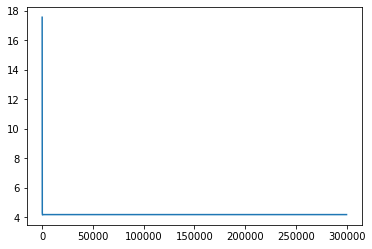

In [ ]:
#show how the error drops during training
#x axis shows the epoch number
#y axis shows the error for given epoch
plt.plot(error_array)

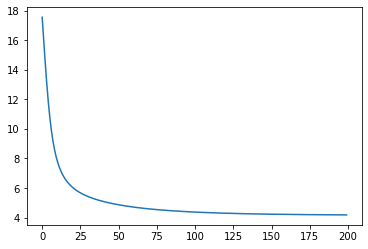

In [ ]:
#plot the plot of error vs epoch number
#set the max_epoch variable to small value and see 
#what is happening at the beginig of traning
#to se plot in range 0-500 epoch, put 500 replacing the text "PUT NUMBER HERE"
max_epoch = 200
plt.plot(error_array[0:max_epoch])

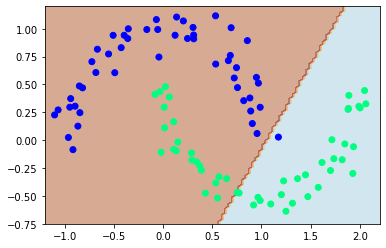

In [ ]:
cmap = plt.get_cmap('Paired')

# Define region of interest by data limits
xmin = -1.2 
xmax = 2.2
ymin = -0.75
ymax = 1.2

steps = 100

x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)


# Plot decision boundary in region of interest

z = np.zeros(xx.shape,dtype=int)

ii=0
for i in x_span:
  jj=0
  for j in y_span:
    if sigmoid(np.dot(np.array([i,j]),weights) + bias) > 0.1:
    #if i==j :
      z[ii,jj] = 1
    jj=jj+1
  ii=ii+1

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

In [ ]:
#neural network with 1 hidden layer for the binary classification of non-linear data.
# -*- coding: utf-8 -*-

np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)

labels = labels.reshape(100, 1)

wh = np.random.rand(len(feature_set[0]),16) 
wo = np.random.rand(16, 1)
lr = 0.03

error_array=[] # prepare a list  to store value of error for each epoch

for epoch in range(500000):
    # feedforward
    zh = np.dot(feature_set, wh)
    ah = sigmoid(zh)

    zo = np.dot(ah, wo)
    ao = sigmoid(zo)

    # Phase1 =======================

    error_out = ((1 / 2) * (np.power((ao - labels), 2)))
    
    #small modification to the code to show
    #error only for epoch which is factor of 10000
    #you cane increase or decrease this factor
    if (epoch % 20000) == 0 :
      print("epoch : "+str(epoch)+" error : "+str(error_out.sum()))

    error_array.append(error_out.sum()) #store error for epoch

    dcost_dao = ao - labels
    dao_dzo = sigmoid_der(zo) 
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Phase 2 =======================

    # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Phase 3 =======================

    # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Update Weights ================

    wh -= lr * dcost_wh
    wo -= lr * dcost_wo

epoch : 0 error : 24.70289577289293
epoch : 20000 error : 1.5436221572471238
epoch : 40000 error : 1.0344527165156792
epoch : 60000 error : 0.6239364148245713
epoch : 80000 error : 0.5693548382311457
epoch : 100000 error : 0.5486378828737982
epoch : 120000 error : 0.537610438249495
epoch : 140000 error : 0.5307254662239752
epoch : 160000 error : 0.5260047096593531
epoch : 180000 error : 0.5225607840084574
epoch : 200000 error : 0.51993467272499
epoch : 220000 error : 0.5178645043325717
epoch : 240000 error : 0.5161897502342911
epoch : 260000 error : 0.5148064280345145
epoch : 280000 error : 0.5136441722417842
epoch : 300000 error : 0.512653641044857
epoch : 320000 error : 0.5117991970822242
epoch : 340000 error : 0.511054450755396
epoch : 360000 error : 0.5103994385802471
epoch : 380000 error : 0.5098187764133195
epoch : 400000 error : 0.5093004156414815
epoch : 420000 error : 0.508834784315425
epoch : 440000 error : 0.5084141809392428
epoch : 460000 error : 0.5080323381878812
epoch : 

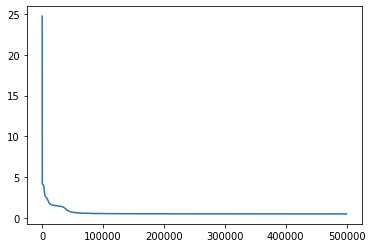

In [ ]:
#show how the error drops during training
#x axis shows the epoch number
#y axis shows the error for given epoch
plt.plot(error_array)

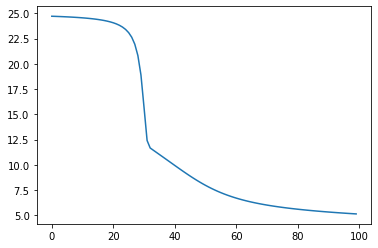

In [ ]:
#show how the error drops during training
#x axis shows the epoch number
#y axis shows the error for given epoch
plt.plot(error_array[0:100])

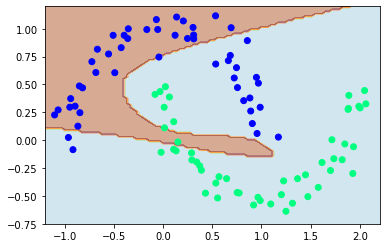

In [ ]:
cmap = plt.get_cmap('Paired')

# Define region of interest by data limits
xmin = -1.2 
xmax = 2.2
ymin = -0.75
ymax = 1.2

steps = 100

x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)


# Plot decision boundary in region of interest

z = np.zeros(xx.shape,dtype=int)

ii=0
for i in x_span:
  jj=0
  for j in y_span:
    features = np.array([i,j])
    zh = np.dot(features, wh)
    ah = sigmoid(zh)
    zo = np.dot(ah, wo)
    ao = sigmoid(zo)

    if sigmoid(ao) > 0.7:
    #if i==j :
      z[ii,jj] = 1
    jj=jj+1
  ii=ii+1

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

# Solution

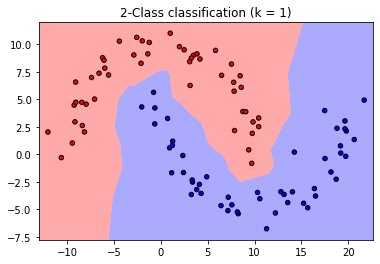

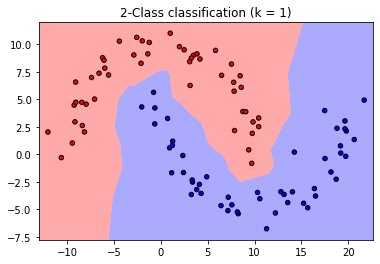

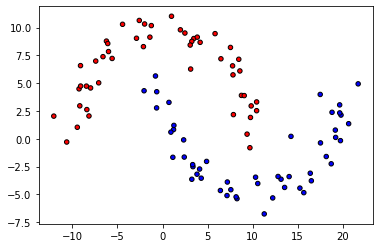

In [ ]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)"
              % (n_neighbors))

plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()